# Tesla Stock                                                                                        

### Main Questions
 1. What was the starting price of the Tesla stock, based on the dataset?
 2. How many stocks were traded per day in 2010 versus 2019?
 3. What can I find in the media that shows why the stock skyrockets/plummets?
 4. Would it be a good idea to buy Tesla stock right now?

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
tes = pd.read_csv('/mnt/c/Users/Public/Documents/dev/tesla/TSLA.csv')

In [3]:
tes.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tes.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Sweet, no missing data!

In [5]:
tes.rename(columns = {'Volume': 'Volume/million'}, inplace=True)
# Only running below code when restarting notebook to ensure values are kept correctly
tes['Volume/million'] = tes['Volume/million']/1000000

Let's set the index as the date:

In [6]:
tes.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume/million
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18.7663
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17.1871
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8.2188
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5.1398
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6.8669
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11.7885
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17.8015
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29.0057


Now let's change the values in the 'Date' column to datetime in order to search for certain years:

In [15]:
tes['Date'] = pd.to_datetime(tes['Date'])

Taking a look into the volume in 2010 and 2019:

In [19]:
tes[tes['Date'].dt.year == 2010]['Volume/million'].mean()

1.5797623076923077

In [20]:
tes[tes['Date'].dt.year == 2019]['Volume/million'].mean()

9.158896825396829

By these calculations, there were more than 7.5 million more trades per day in 2019 than in 2010! 

Creating year variables to use in the next section:

In [8]:
twentyten = tes[tes['Date'].dt.year == 2010]
twentyeleven = tes[tes['Date'].dt.year == 2011]
twentytwelve = tes[tes['Date'].dt.year == 2012]
twentythirteen = tes[tes['Date'].dt.year == 2013]
twentyfourteen = tes[tes['Date'].dt.year == 2014]
twentyfifteen = tes[tes['Date'].dt.year == 2015]
twentysixteen = tes[tes['Date'].dt.year == 2016]
twentyseventeen = tes[tes['Date'].dt.year == 2017]
twentyeighteen = tes[tes['Date'].dt.year == 2018]
twentynineteen = tes[tes['Date'].dt.year == 2019]
twentytwenty = tes[tes['Date'].dt.year == 2020]

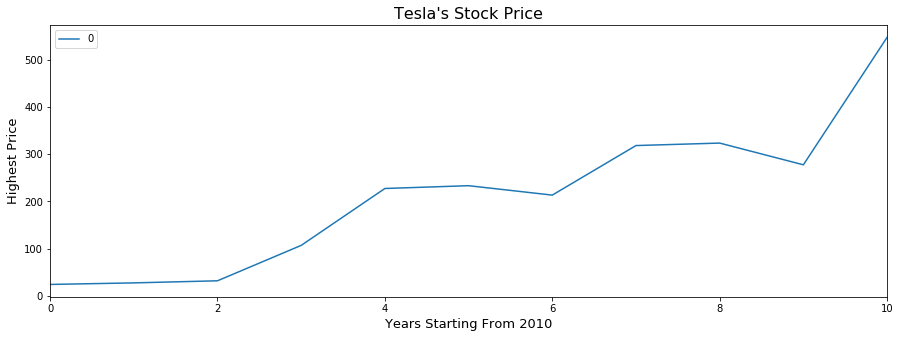

In [9]:
year_list = [twentyten, twentyeleven, twentytwelve, twentythirteen, 
             twentyfourteen, twentyfifteen, twentysixteen, twentyseventeen, 
             twentyeighteen, twentynineteen, twentytwenty
            ]
mean_list = []
for i in year_list:
    means = i['High'].mean()
    mean_list.append(means)
Avg_Year_Highs = pd.DataFrame(mean_list)
Avg_Year_Highs.rename(columns = {0: 'Average'})
Avg_Year_Highs.plot(figsize=(15,5))
plt.ylabel('Highest Price', fontsize=13), plt.xlabel('Years Starting From 2010', fontsize=13),
plt.title('Tesla\'s Stock Price', fontsize=16);

As we see above, the stock price started to begin it's rise in 2012, let's look into that. We notice another rise in 2016, did something specific come out around that time? We will also need to look at the fall in 2018 as well as the 2019 skyrocket. This graph is based off the mean value for a given year. 

- 2012: The Model S was brought to the streets while the Model X was revealed. The stock price at the beginning of 2012 was 29 dollars.
- 2014: Forty days into 2014 the stock price had a high of 265 dollars.
- 2015: Late September, Model X is deliverd. The autopilot feature was also deliverd. The rise from this release is seen throughout 2016!
- 2018: A lot of media came out about Tesla during the year. The stock price decline is credited to Tesla talking about bankruptcy, as well as Musk tweeting about Tesla going private.
- 2019: Tesla stock prices in 2019 ended at an all-time high, but that wasn't the case for the whole year. The stock price plummeted during the first few months due to the SEC investigating Musk for fraud and the cybertruck showing mishap. When Musk settled with the SEC and Tesla reported the highest sales to date, the stock price began rising and hasn't stopped since.

Looking at 2019's yearly graph next!

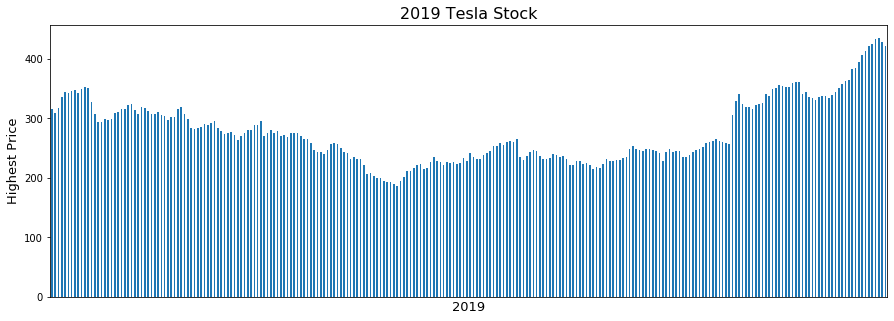

In [10]:
tes['Date'] = pd.to_datetime(tes['Date'])
twentynineteen = tes[tes['Date'].dt.year == 2019]
twentynineteen['High'].mean()
plot = twentynineteen['High'].plot(kind='bar', figsize=(15,5))
plt.ylabel('Highest Price', fontsize=13)
plot.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.title('2019 Tesla Stock', fontsize=16), plt.xlabel('2019', fontsize=13)
plt.xticks([]);

The next two code outputs show the data I used for years 2012 and 2014:

In [11]:
twentytwelve['High'].head()

382    29.500000
383    28.670000
384    27.930000
385    27.790001
386    27.490000
Name: High, dtype: float64

In [21]:
twentyfourteen['High'][921]

265.0

#### Recommend buying stock?

From the historical trend, the stock market has always seen an increase over time. In terms of Tesla, I believe it is the future. Technology is always getting more efficient and changing the way our world functions. I see electric-powered vehicles overtaking the auto industry and becoming the new way of driving!  